# Check infinite well potential

In [1]:
#Load the modules needed
import numpy as np
import matplotlib.pyplot as plt
import scipy
from colorsys import hls_to_rgb
import pylab as pyl
from utilities import storer, grid, fields

In [2]:
#Load parameters used and grid
parameters=storer.reader("outputfiles/testing/inifile.dat",secondread=True)
grids=grid.creategrid(parameters)

#Load the files
parameters[6][0]=['from-file',parameters[10]+'/field.npy']
psi=fields.spin0(parameters, grids)
pot=np.load(parameters[10]+'/potential.npy')
energy=np.load(parameters[10]+'/energy.npy')
totalmass=np.load(parameters[10]+'/totalmass.npy')
timeline=np.load(parameters[10]+'/timeline.npy')

*-----------------------------------*
Dimension: 1
Box length: 10.0
N: 64
Total mass: 1.0
 
Field configuration: spin0
Condensate fraction: 1.0
Initial configuration condensate: random
 
Potential type: testing
Potential parameters:
  lengthwell: 3.0
 
Evolver: kickdriftkick
Number of iterations: 10000
Saving every: 200 steps
Imaginary time propagation: True
 
Output files in: outputfiles/testing/
*-----------------------------------*


This method shoud give the ground state, the function associated is
$$\psi_{d=1}=\sqrt{\frac{2}{a}}\sin\bigg(\frac{\pi x}{a}\bigg)$$ if $0<x<a$ and $$\psi_{d=1}=0$$ in any other parts.

The energy for $d=1$ is
$$E_{d=1}=\frac{\pi^2}{2a^2}$$
For $d=2$ is
$$\psi_{d=2}=\frac{2}{a}\sin\bigg(\frac{\pi x}{a}\bigg)\sin\bigg(\frac{\pi y}{a}\bigg)$$ if $0<x<a$ and $0<y<a$ and $$\psi_{d=2}=0$$ in any other parts.
$$E_{d=2}=\frac{\pi^2}{a^2}$$
For $d=3$ is
$$\psi_{d=3}=\bigg(\frac{2}{a}\bigg)^{\frac{3}{2}}\sin\bigg(\frac{\pi x}{a}\bigg)\sin\bigg(\frac{\pi y}{a}\bigg)\sin\bigg(\frac{\pi z}{a}\bigg)$$ if $0<x<a$, $0<y<a$ and $0<z<a$ and $$\psi_{d=3}=0$$ in any other parts.
$$E_{d=3}=\frac{3\pi^2}{2a^2}$$

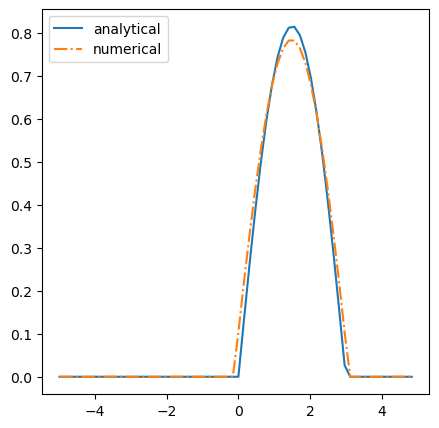

In [3]:
if parameters[0]==1:
    efe=np.sqrt(2/parameters[8][1])*np.sin(np.pi*grids[2]/parameters[8][1])
    for i in range(parameters[2]):
        if grids[2][i]<0 or grids[2][i]>parameters[8][1]:
            efe[i]=0
    thenergy=np.pi**2/(2*parameters[8][1]**2)

    fig = plt.figure(figsize=[5,5])
    plt.plot(grids[2],efe, label="analytical")
    plt.plot(grids[2],np.sqrt(psi.re**2+psi.imag**2),'-.', label="numerical")
    plt.legend()
    plt.show()
elif parameters[0]==2:
    efe2=(2/parameters[8][1])*np.sin(np.pi*grids[2]/parameters[8][1])*np.sin(np.pi*grids[4]/parameters[8][1])
    for i in range(parameters[2]):
        for j in range(parameters[2]):
            if (grids[2][i][j]<0 or grids[2][i][j]>parameters[8][1]) or (grids[4][i][j]<0 or grids[4][i][j]>parameters[8][1]):
                efe2[i][j]=0
    thenergy=np.pi**2/(parameters[8][1]**2)

    figpot, (ax1pot, ax2pot) = plt.subplots(1, 2, figsize=(7,3))
    ax1pot.plot(grids[4][0],efe2[:,np.where(efe2==np.amax(efe2))[1][0]], label="analytical")   
    ax2pot.plot(grids[4][0],efe2[np.where(efe2==np.amax(efe2))[0][0],:], label="analytical")   
    ax1pot.plot(grids[4][0],np.sqrt(psi.re**2+psi.imag**2)[:,np.where(efe2==np.amax(efe2))[1][0]],'-.', label="numerical")   
    ax2pot.plot(grids[4][0],np.sqrt(psi.re**2+psi.imag**2)[np.where(efe2==np.amax(efe2))[0][0],:],'-.', label="numerical")
    ax1pot.legend()
    ax2pot.legend()

    figpot.tight_layout(pad=2.0)
    
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(grids[2], grids[4], efe2, alpha=0.8, label="analytical")
    ax.scatter(grids[2], grids[4], np.sqrt(psi.re**2+psi.imag**2), alpha=0.2, label="numerical")

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f')
    ax.legend()
    plt.show()
    
    fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
    fig2a=ax1.contourf(grids[2][:,int(parameters[2]/2)], grids[4][np.where(efe2==np.amax(efe2))[0][0],:], efe2)
    fig2b=ax2.contourf(grids[2][:,int(parameters[2]/2)], grids[4][np.where(efe2==np.amax(efe2))[0][0],:], np.sqrt(psi.re**2+psi.imag**2))
    plt.colorbar(fig2a, ax=ax1)
    plt.colorbar(fig2b, ax=ax2)
    plt.axis('scaled')
    plt.show()
    
elif parameters[0]==3:
    efe3=(np.sqrt(2/parameters[8][1]))**3*np.sin(np.pi*grids[2]/parameters[8][1])*np.sin(np.pi*grids[4]/parameters[8][1])*np.sin(np.pi*grids[6]/parameters[8][1])
    for i in range(parameters[2]):
        for j in range(parameters[2]):
            for k in range(parameters[2]):
                if (grids[2][i][j][k]<0 or grids[2][i][j][k]>parameters[8][1]) or (grids[4][i][j][k]<0 or grids[4][i][j][k]>parameters[8][1]) or (grids[6][i][j][k]<0 or grids[6][i][j][k]>parameters[8][1]):
                    efe3[i][j][k]=0
    thenergy=3*np.pi**2/(2*parameters[8][1]**2)
    
    figpot, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
    ax1.plot(grids[6][0][0],efe3[:,np.where(efe3==np.amax(efe3))[1][0],np.where(efe3==np.amax(efe3))[2][0]], label="analytical")   
    ax2.plot(grids[6][0][0],efe3[np.where(efe3==np.amax(efe3))[0][0],:,np.where(efe3==np.amax(efe3))[2][0]], label="analytical")
    ax3.plot(grids[6][0][0],efe3[np.where(efe3==np.amax(efe3))[0][0],np.where(efe3==np.amax(efe3))[1][0],:], label="analytical")  
    ax1.plot(grids[6][0][0],np.sqrt(psi.re**2+psi.imag**2)[:,np.where(efe3==np.amax(efe3))[1][0],np.where(efe3==np.amax(efe3))[2][0]],'-.', label="numerical")   
    ax2.plot(grids[6][0][0],np.sqrt(psi.re**2+psi.imag**2)[np.where(efe3==np.amax(efe3))[0][0],:,np.where(efe3==np.amax(efe3))[2][0]],'-.', label="numerical")
    ax3.plot(grids[6][0][0],np.sqrt(psi.re**2+psi.imag**2)[np.where(efe3==np.amax(efe3))[0][0],np.where(efe3==np.amax(efe3))[1][0],:],'-.', label="numerical")

    ax1.set_xlabel('x')
    ax1.set_ylabel('f')
    ax1.legend()
    ax2.set_xlabel('y')
    ax2.set_ylabel('f')
    ax2.legend()
    ax3.set_xlabel('z')
    ax3.set_ylabel('f')
    ax3.legend()
    
    figpot.tight_layout(pad=2.0)

The energy obtained numerically is E=0.46899670207316063 and the analytical is E=0.5483113556160755


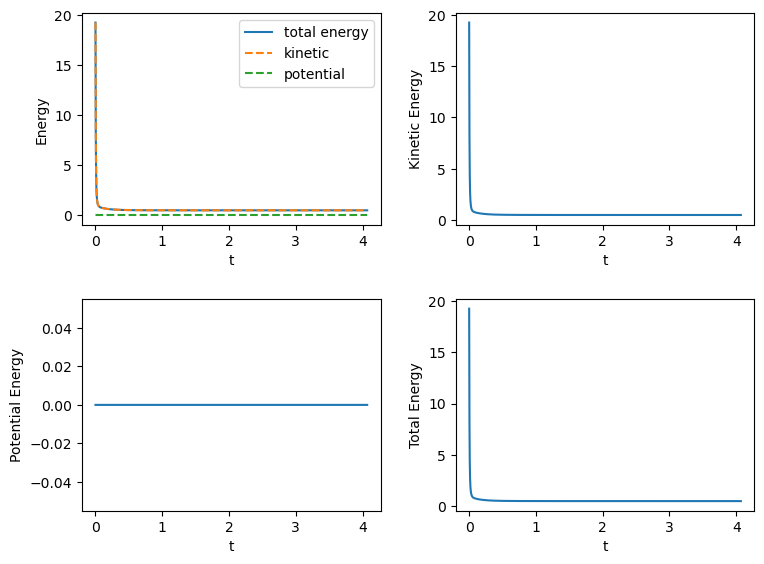

In [4]:
print(f'The energy obtained numerically is E={energy[2][0][parameters[9][1]-1]} and the analytical is E={thenergy}')
figdcompfin, ((ax1dcompfin, ax2dcompfin), (ax3dcompfin, ax4dcompfin)) = plt.subplots(2, 2, figsize=(8,6))
ax1dcompfin.set_xlabel("t")
ax1dcompfin.set_ylabel("Energy")
ax1dcompfin.plot(timeline,energy[2][0],label="total energy")
ax1dcompfin.plot(timeline,energy[2][1],'--',label="kinetic")
ax1dcompfin.plot(timeline,energy[2][2],'--',label="potential")
ax1dcompfin.legend()
ax2dcompfin.set_xlabel("t")
ax2dcompfin.set_ylabel("Kinetic Energy")
ax2dcompfin.plot(timeline,energy[2][1])
ax3dcompfin.set_xlabel("t")
ax3dcompfin.set_ylabel("Potential Energy")
ax3dcompfin.plot(timeline,energy[2][2])
ax4dcompfin.set_xlabel("t")
ax4dcompfin.set_ylabel("Total Energy")
ax4dcompfin.plot(timeline,energy[2][0])
figdcompfin.tight_layout(pad=2.0)
shower=plt.show()

1.0000000000000002
1.0


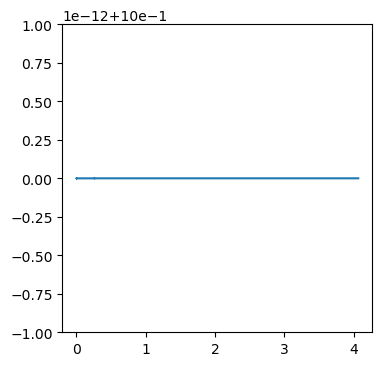

In [5]:
#Total number plot
print(totalmass[2][0])
print(totalmass[2][parameters[9][1]-1])
fig = plt.figure(figsize=[4,4])
plt.plot(timeline,totalmass[2])
plt.show()

In [ ]:
#Phase plot  
def colorize(z):   
    rex=[]
    for i in range(len(z.real)):
        rex.append([z.real[i]])
    imy=[[]]
    for i in range(len(z.imag)):
        imy[0].append(z.imag[i])

    rex=np.array(rex, dtype='float32')    
    imy=np.array(imy, dtype='float32') 
    
    r = np.abs(rex+1.0j*imy)
    arg = np.angle(rex+1.0j*imy) 

    h = (arg + np.pi)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.3)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    return c


img = colorize(psi)
plt.imshow(img)
plt.show()

In [ ]:
angle=np.angle(psi)
fig, ax = plt.subplots(figsize=(5.5, 4))
cf = ax.pcolormesh(grids[2], grids[4], angle, shading='gouraud', cmap='hsv')
ax.set_title('Phase')
ax.set_xlabel(r'$\operatorname{Re} z$')
ax.set_ylabel(r'$\operatorname{Im} z$')
ax.axis('scaled')

cb = plt.colorbar(cf, orientation='vertical')
cb.set_label(r'$\operatorname{Arg} z$')
fig.tight_layout()